In [25]:
import xarray as xr
import requests

In [13]:
# Load .nc file
dataset = xr.open_dataset('c:\\Users\\olive\\Downloads\\PBL_IMAGE_SSP2_categorial_land_cover_type_5min.nc')

# To see the structure of the file, print the dataset
print(dataset)


<xarray.Dataset>
Dimensions:    (latitude: 2160, longitude: 4320, time: 27)
Coordinates:
  * latitude   (latitude) float64 89.96 89.88 89.79 ... -89.79 -89.87 -89.96
  * longitude  (longitude) float64 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
  * time       (time) datetime64[ns] 1970-01-01 1975-01-01 ... 2100-01-01
Data variables:
    GLCT       (time, latitude, longitude) float64 ...
Attributes:
    title:        IMAGE 3.0, project: SSPs, scenario: SSP2, variable: GLCT
    conventions:  CF-1.6
    institution:  PBL Netherlands Environmental Assessment Agency (http://www...
    source:       IMAGE-LPJ; image25/MODEL/branches/imager1757#1833,interface...
    references:   http://www.pbl.nl/image;https://doi.org/10.1016/j.gloenvcha...
    history:       
    licence:      CC BY. The IMAGE-team would appreciate to be involved in pr...


In [21]:
# Print the structure of the file by iterating over variables
for var_name, variable in dataset.data_vars.items():
    print(f"{var_name}:")
    print(f"  Dimensions: {variable.dims}")
    print(f"  Size: {variable.size}")
    print(f"  Attributes: {variable.attrs}\n")

GLCT:
  Dimensions: ('time', 'latitude', 'longitude')
  Size: 251942400
  Attributes: {'qualifier': 'agricultural land (1), extensive grassland (2), carbon plantation (3), regrowth forest abandoning (4),regrowth forest timber (5), biofuels(6), ice (7), tundra (8), wooded tundra (9), boreal forest (10), cool conifer forest (11), temp. mixed forest (12), temp. decid. forest (13), warm mixed forest (14), grassland/steppe (15), hot desert (16), scrubland (17), savanna (18), tropical woodland (19), tropical forest (20)', 'units': '-', 'long_name': 'categorial land cover type', 'flag_values': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]), 'flag_meanings': 'agricultural_land extensive_grassland carbon_plantation regrowth_forest_abandoning regrowth_forest_timber biofuels ice tundra wooded_tundra boreal_forest cool_conifer_forest temperate_mixed_forest temperate_deciduous_forest warm_mixed_forest grassland-steppe hot_desert scrubland savanna trop

In [15]:
# Access the 'time' variable
time_var = dataset['time']

# Print the first few and last few time values to understand its range
print("First few time values:")
print(time_var[:5].values)

First few time values:
['1970-01-01T00:00:00.000000000' '1975-01-01T00:00:00.000000000'
 '1980-01-01T00:00:00.000000000' '1985-01-01T00:00:00.000000000'
 '1990-01-01T00:00:00.000000000']


In [18]:
# Specify the land use variable (this would probably be a good to loop throuh all the land cover variables listed above)
land_use = 'agricultural_land'

# Specify the year as a string
year = '2050'

# Concatenate to form the full datetime string
datetime = f'{year}-01-01T00:00:00.000000000'

In [22]:
# Use .sel with the created string to select the desired time step
data = dataset[land_use].sel(time=datetime)

data.plot()
plt.title(f'{land_use.capitalize()} at Time: {datetime}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

KeyError: 'agricultural_land'

C:\Users\olive\AppData\Local\Temp\ipykernel_12896\1641367903.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', 20) # 'tab20' colormap with 20 discrete colors


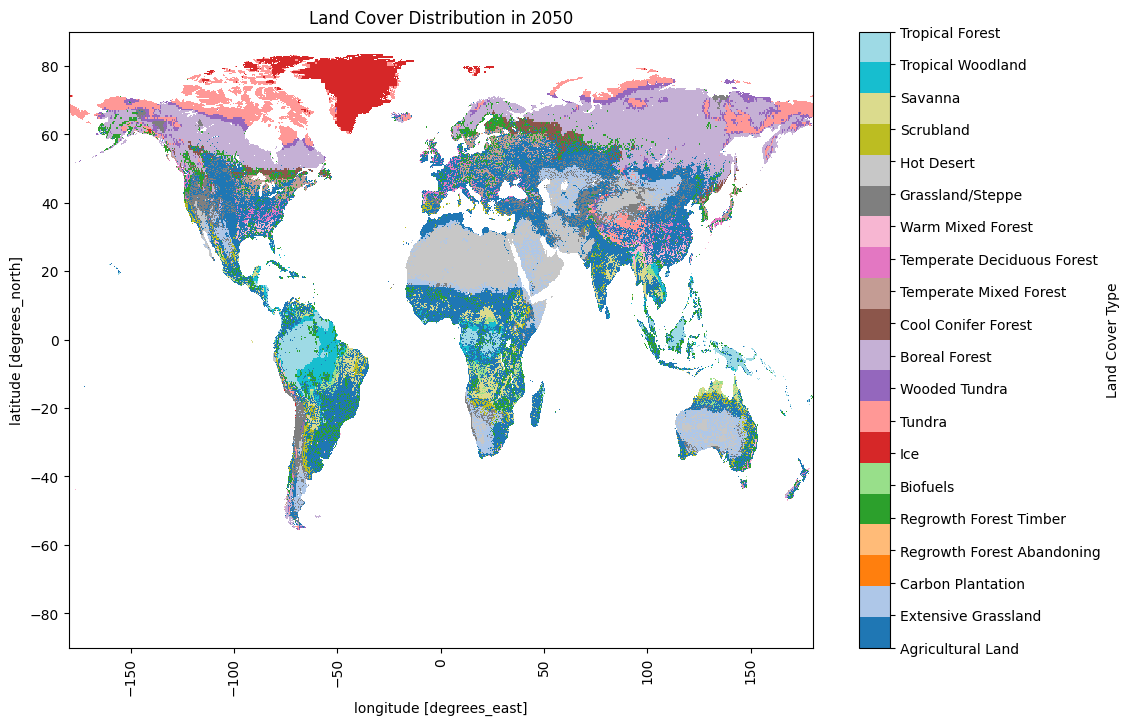

In [23]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Load the .nc file
file_path = r'c:\Users\olive\Downloads\PBL_IMAGE_SSP2_categorial_land_cover_type_5min.nc'
dataset = xr.open_dataset(file_path)

# Specify the year and create the datetime string
year = '2050'
datetime = f'{year}-01-01T00:00:00.000000000'

# Select the GLCT data for the specified time
glct_data_at_time = dataset['GLCT'].sel(time=datetime)

# Define a colormap (this is an example, feel free to customize it)
cmap = plt.cm.get_cmap('tab20', 20) # 'tab20' colormap with 20 discrete colors

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
cbar_label = 'Land Cover Type'
im = glct_data_at_time.plot(ax=ax, add_colorbar=True, cmap=cmap, cbar_kwargs={'label': cbar_label})

# Create a colorbar with labels for land cover types
# The following dictionary maps integer codes to land cover types
# Adjust the labels based on the 'flag_values' and 'flag_meanings' attributes from your dataset
land_cover_labels = {
    1: 'Agricultural Land', 2: 'Extensive Grassland', 3: 'Carbon Plantation', 4: 'Regrowth Forest Abandoning',
    5: 'Regrowth Forest Timber', 6: 'Biofuels', 7: 'Ice', 8: 'Tundra', 9: 'Wooded Tundra', 10: 'Boreal Forest',
    11: 'Cool Conifer Forest', 12: 'Temperate Mixed Forest', 13: 'Temperate Deciduous Forest', 14: 'Warm Mixed Forest',
    15: 'Grassland/Steppe', 16: 'Hot Desert', 17: 'Scrubland', 18: 'Savanna', 19: 'Tropical Woodland', 20: 'Tropical Forest'
}

# Modify the colorbar to show land cover type labels
cbar = im.colorbar
cbar.set_ticks(range(1, 21))
cbar.set_ticklabels([land_cover_labels[i] for i in range(1, 21)])
plt.xticks(rotation=90) # Rotate x-axis labels if needed
plt.title(f'Land Cover Distribution in {year}')
plt.show()


In [26]:
# Load crop data from github
# URL of the GeoJSON file
url = 'https://raw.githubusercontent.com/HotspotStoplight/HotspotStoplight/main/CropBoxes/CR_Crop1.geojson'

# Fetch the GeoJSON content from the URL
response = requests.get(url)
geojson_data = response.json()

# Assuming the first feature's geometry contains the rectangle
# Check if the GeoJSON is structured as a FeatureCollection
if geojson_data['type'] == 'FeatureCollection':
    # Assuming we're interested in the first feature's geometry
    # and it's a Polygon
    coordinates = geojson_data['features'][0]['geometry']['coordinates'][0]
else:
    # If not a FeatureCollection, directly access the geometry (adjust as needed)
    coordinates = geojson_data['geometry']['coordinates'][0]

# Extract latitudes and longitudes
lats, lons = zip(*coordinates)

# Find min and max for latitude and longitude
min_lat, max_lat = min(lats), max(lats)
min_lon, max_lon = min(lons), max(lons)

# Create slices
lon_range = slice(min_lat, max_lat)  # From min to max longitude
lat_range = slice(min_lon, max_lon)  # From min to max latitude

# Print the slices
print(f"Latitude range: {lat_range}")
print(f"Longitude range: {lon_range}")

Latitude range: slice(5.516416423420095, 13.701056321163325, None)
Longitude range: slice(-91.62335850740233, -76.87422516816252, None)


In [27]:
# Crop and plot the data
# Select the GLCT data for the specified time
glct_data_at_time = dataset['GLCT'].sel(time=datetime, lat=lat_range, lon=lon_range)

# Define a colormap (this is an example, feel free to customize it)
cmap = plt.cm.get_cmap('tab20', 20) # 'tab20' colormap with 20 discrete colors

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
cbar_label = 'Land Cover Type'
im = glct_data_at_time.plot(ax=ax, add_colorbar=True, cmap=cmap, cbar_kwargs={'label': cbar_label})

# Create a colorbar with labels for land cover types
# The following dictionary maps integer codes to land cover types
# Adjust the labels based on the 'flag_values' and 'flag_meanings' attributes from your dataset
land_cover_labels = {
    1: 'Agricultural Land', 2: 'Extensive Grassland', 3: 'Carbon Plantation', 4: 'Regrowth Forest Abandoning',
    5: 'Regrowth Forest Timber', 6: 'Biofuels', 7: 'Ice', 8: 'Tundra', 9: 'Wooded Tundra', 10: 'Boreal Forest',
    11: 'Cool Conifer Forest', 12: 'Temperate Mixed Forest', 13: 'Temperate Deciduous Forest', 14: 'Warm Mixed Forest',
    15: 'Grassland/Steppe', 16: 'Hot Desert', 17: 'Scrubland', 18: 'Savanna', 19: 'Tropical Woodland', 20: 'Tropical Forest'
}

# Modify the colorbar to show land cover type labels
cbar = im.colorbar
cbar.set_ticks(range(1, 21))
cbar.set_ticklabels([land_cover_labels[i] for i in range(1, 21)])
plt.xticks(rotation=90) # Rotate x-axis labels if needed
plt.title(f'Land Cover Distribution in {year}')
plt.show()


KeyError: "'lat' is not a valid dimension or coordinate"